# Likelihood evaluations for Palanque-Delabrouille et al. (2013)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
# our own modules
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import camb_cosmo
import fit_linP
import likelihood
import lya_theory

### Read P1D data from Palanque-Delabrouille et al. (2013)

In [2]:
data=data_PD2013.P1D_PD2013(blind_data=True,toy_data=True)
zs=data.z
k_kms=data.k

### Specify suite of simulations to use, read P1D arxiv and setup simplest emulator

In [3]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='polyfit'
if emu_type is 'linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
else:
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,emu_type=emu_type,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=True,paramList=paramList,train=True)

latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0.276, -2.311, 1.191, -0.09000000000000008, 5.605], '3': [0.376, -2.291, 0.813, -1.23, 9.805], '4': [0.3, -2.289, 2.703, -1.35, 15.685], '5': [0.38, -2.297, 2.487, 0.5700000000000003, 13.375], '6': [0.324, -2.303, 1.5150000000000001, -0.20999999999999996, 14.005], '7': [0.364, -2.313, 2.649, 1.3499999999999996, 11.275], '8': [0.29200000000000004, -2

39 sample has sim params = [0.40800000000000003, -2.273, 1.7850000000000004, -0.33000000000000007, 10.434999999999999]
simulation has 3 redshifts
undersample_z = 1
40 sample has sim params = [0.42000000000000004, -2.317, 1.461, 0.6299999999999999, 7.915]
simulation has 3 redshifts
undersample_z = 1
41 sample has sim params = [0.336, -2.339, 2.4330000000000003, 0.9300000000000002, 8.965]
simulation has 3 redshifts
undersample_z = 1
42 sample has sim params = [0.348, -2.275, 1.569, 1.4699999999999998, 11.065000000000001]
simulation has 3 redshifts
undersample_z = 1
43 sample has sim params = [0.444, -2.309, 1.299, -1.0499999999999998, 13.795]
simulation has 3 redshifts
undersample_z = 1
44 sample has sim params = [0.43200000000000005, -2.253, 1.7310000000000003, 0.2100000000000002, 14.635]
simulation has 3 redshifts
undersample_z = 1
45 sample has sim params = [0.256, -2.293, 2.8649999999999998, 0.4500000000000002, 13.585]
simulation has 3 redshifts
undersample_z = 1
46 sample has sim pa

 /home/font/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 2000 points
Optimised


### Setup Lyman alpha theory

In [4]:
theory = lya_theory.LyaTheory(zs,emulator=emu,verbose=False)

Note: redshifts have been re-sorted (earliest first)


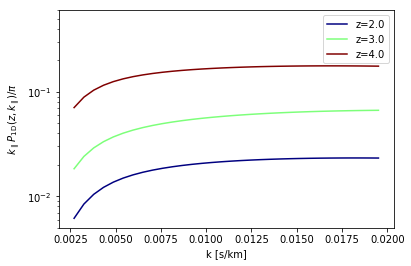

In [5]:
theory.plot_p1d(k_kms,plot_every_iz=1)

### Compare emulator calls to models in arxiv, for all redhsifts

In [6]:
free_parameters=['ln_tau_0']
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters)
like.go_silent()

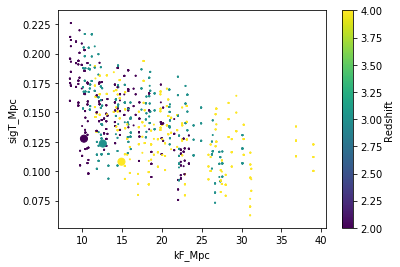

In [7]:
like.overplot_emulator_calls('kF_Mpc','sigT_Mpc')

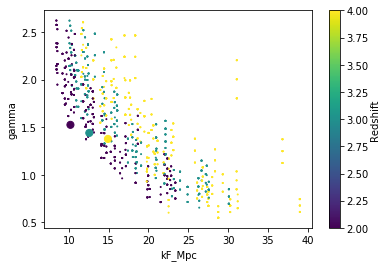

In [8]:
like.overplot_emulator_calls('kF_Mpc','gamma')

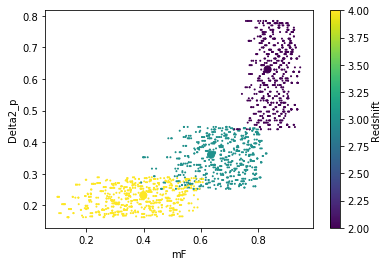

In [9]:
like.overplot_emulator_calls('mF','Delta2_p',tau_scalings=True)

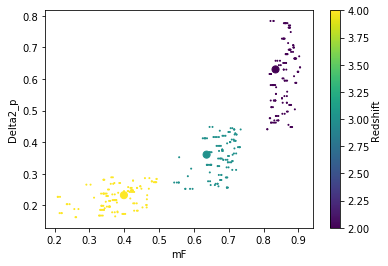

In [10]:
like.overplot_emulator_calls('mF','Delta2_p',tau_scalings=False)

### For each redshift, plot data vs model

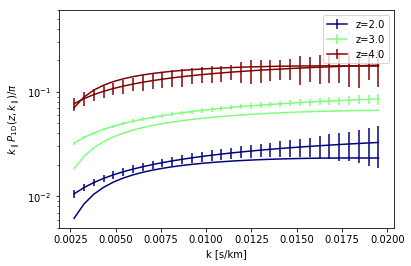

In [11]:
like.plot_p1d(plot_every_iz=1)

### Plot chi2 vs mean optical depth parameter

In [12]:
print('chi2 =',like.get_chi2())

chi2 = 3974.2862539242747


In [13]:
# will explore all range of effective optical depth at z=3
value_in_cube=np.linspace(0.0,1.0,100)
Np=len(value_in_cube)
chi2=np.empty(Np)
log_like=np.empty(Np)
log_like_noemu=np.empty(Np)
log_like_nodet=np.empty(Np)
log_like_chi2=np.empty(Np)
tau0=np.empty(Np)
par=like.free_params[0]
for i in range(Np):
    ln_tau_0=par.value_from_cube(value_in_cube[i])
    tau0[i]=np.exp(ln_tau_0)
    chi2[i] =like.get_chi2(values=[value_in_cube[i]])
    log_like[i]=like.get_log_like(values=[value_in_cube[i]],ignore_log_det_cov=False,add_emu_cov=True)
    log_like_noemu[i]=like.get_log_like(values=[value_in_cube[i]],ignore_log_det_cov=False,add_emu_cov=False)
    log_like_nodet[i]=like.get_log_like(values=[value_in_cube[i]],ignore_log_det_cov=True,add_emu_cov=True)
    log_like_chi2[i]=like.get_log_like(values=[value_in_cube[i]],ignore_log_det_cov=True,add_emu_cov=False)
    #print(i,value_in_cube[i],tau0[i],np.exp(-tau0[i]),'chi2 =',chi2[i])

Text(0.5, 0, 'value')

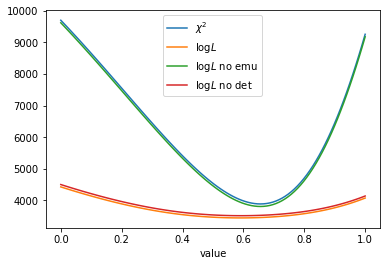

In [14]:
plt.plot(value_in_cube,chi2,label=r'$\chi^2$')
plt.plot(value_in_cube,-2.0*log_like,label=r'$\log L$')
plt.plot(value_in_cube,-2.0*log_like_noemu,label=r'$\log L$ no emu')
plt.plot(value_in_cube,-2.0*log_like_nodet,label=r'$\log L$ no det')
plt.legend()
plt.xlabel('value')

Text(0.5, 0, 'value')

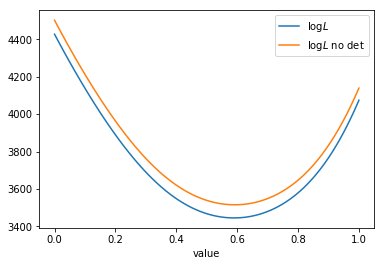

In [15]:
plt.plot(value_in_cube,-2.0*log_like,label=r'$\log L$')
plt.plot(value_in_cube,-2.0*log_like_nodet,label=r'$\log L$ no det')
plt.legend()
plt.xlabel('value')

In [16]:
p1d,covar=theory.get_p1d_kms(k_kms=k_kms,return_covar=True)

In [17]:
p1d[0].shape

(32,)

In [18]:
covar[0].shape

(32, 32)

Text(0, 0.5, '$k_\\parallel \\, P_{\\rm 1D}(z,k_\\parallel) / \\pi$')

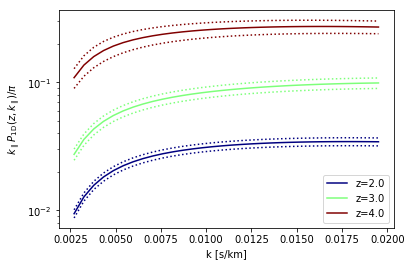

In [19]:
# plot only few redshifts for clarity
Nz=len(zs)
plot_every_iz=1
for iz in range(0,Nz,plot_every_iz):
    # acess data for this redshift
    z=zs[iz]
    p1d_iz=p1d[iz]
    error_iz=np.sqrt(np.diagonal(covar[iz]))
    # plot everything
    col = plt.cm.jet(iz/(Nz-1))
    plt.plot(k_kms,p1d_iz*k_kms/np.pi,color=col,ls='-',label='z=%.1f'%z)
    plt.plot(k_kms,(p1d_iz+error_iz)*k_kms/np.pi,color=col,ls=':')
    plt.plot(k_kms,(p1d_iz-error_iz)*k_kms/np.pi,color=col,ls=':')

plt.yscale('log')
plt.legend()
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
#plt.ylim(0.005,0.6)

In [20]:
iz=0
data_cov=data.get_cov_iz(iz)
emu_cov=covar[iz]

In [21]:
cov=data_cov+emu_cov

Text(0.5, 1.05, 'Covariance matrix')

<Figure size 576x576 with 0 Axes>

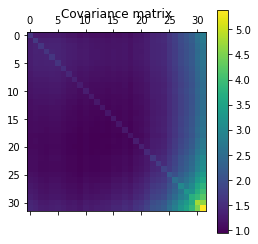

In [22]:
plt.figure(figsize=[8,8])
plt.matshow(cov)
plt.colorbar()
plt.title('Covariance matrix')

Text(0.5, 1.05, 'Emulator covariance matrix')

<Figure size 576x576 with 0 Axes>

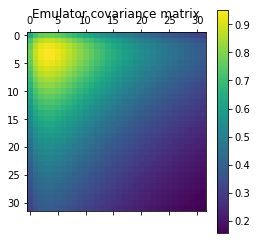

In [23]:
plt.figure(figsize=[8,8])
plt.matshow(emu_cov)
plt.colorbar()
plt.title('Emulator covariance matrix')

Text(0.5, 1.05, 'Data covariance matrix')

<Figure size 576x576 with 0 Axes>

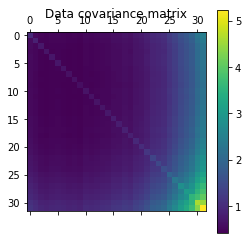

In [24]:
plt.figure(figsize=[8,8])
plt.matshow(data_cov)
plt.colorbar()
plt.title('Data covariance matrix')